<a href="https://colab.research.google.com/github/okana2ki/multiV/blob/main/senkei_ans1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

このノートブックは、以下からダウンロードしたものを改変したものです：

[高等学校における「情報II」のためのデータサイエンス・データ解析入門](https://www.stat.go.jp/teacher/comp-learn-04.html)（総務省統計局）

# 1.線形回帰

## ライブラリーのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

↑どのような用途で使うライブラリか、AIに尋ねてみよう。

## データの読み込み

読み込み手順
1. moodleからデータファイルsenkei.csvをダウンロード  
2. Colab画面の一番左のカラムの一番下のフォルダアイコンをクリック
3. 現れたファイル表示用のカラムにsenkei.csvをドラッグアンドドロップ
4. 下のコードセルを実行



下記のプログラムは、データファイルをColabのカレントディレクトリ（初期状態では通常contentディレクトリ）の直下に置いてあることを前提に書いてあります。他の場所のファイルを参照する場合は、下のコードセルのファイルパス（"に挟まれたsenkei.csv）を適宜書き換えて下さい（""は必要なので残す）。

ファイルパスのコピー手順
1. senkei.csvにマススオン（マウスカーソルをファイル名の上に重ねる）
2. 現れた3点メニューをクリック
3. 「パスをコピー」をクリック

データ内容は以下の通りです。

ID：ID  
sales：売上個数  
insta_post：Instagram投稿数  
insta_good：Instagramいいね！数  
flyer：チラシ配布枚数  
event：イベントあり＝１、イベントなし＝０  
new_item：新作発売日＝１  
holiday：土日祝＝１

↓index_col=0 という指定がどのような働きをするか、df.head()の.head()はどのような働きをするか、AIに尋ねてみよう。

In [2]:
df = pd.read_csv("senkei.csv", index_col=0)  # ← データファイルのパスを正しく指定して下さい。
df.head()

,sales,insta_post,insta_good,flyer,event,new_item,holiday
ID,,,,,,,
1,62,0,20,0,0,0,0
2,60,0,24,0,0,0,0
3,104,0,26,0,0,0,0
4,102,0,22,0,0,0,0
5,178,0,39,0,0,0,1


↑Colab AIが次のステップとして提案してきた「Generate code with df」や「View recommended plots」をクリックしてみよう！

In [ ]:
# dfのサイズを表示
df.shape

(53, 7)

↑データが53行あり、インデックス列（左端の列）以外に7列あることを示す。

## 単回帰分析

説明変数をinsta_good、目的変数をsalesとして、単回帰分析を行います。

In [3]:
# 説明変数insta_good
X = df.iloc[:, 2].values  # ← Colab AIで教えてもらおう
X = X.reshape(-1,1)  # reshapeでどのような変換をしているか？なぜそれが必要か？Colab AIに尋ねてみましょう

# 目的変数sales
Y = df.iloc[:, 0].values

以下のプログラムもColab AIで教えてもらおう

In [4]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 予測モデルを作成
clf.fit(X, Y)

# 回帰係数
print(clf.coef_)

# 切片
print(clf.intercept_)

# 決定係数
print(clf.score(X, Y))

[2.05852128]
101.71515440413765
0.5218980221448157


insta_goodの回帰係数と、単回帰の式の切片が分かりました。  
決定係数は、0～1の範囲の値をとり、値が大きいほどモデルが適切にデータを表現できているといえます。

対応する散布図を作成し、回帰直線を描き加えてみましょう。

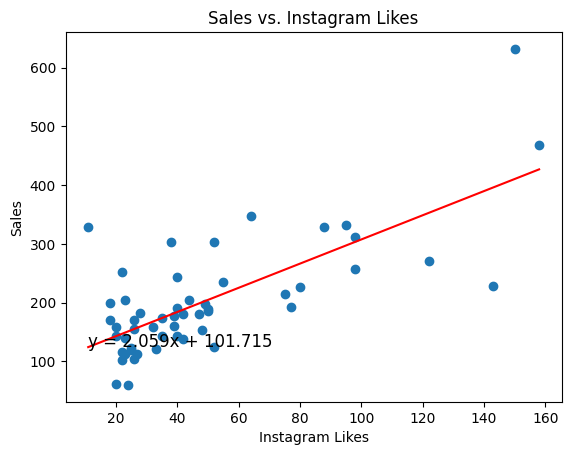

In [5]:
# prompt: salesとinsta_goodの散布図を作成し、単回帰分析の回帰式を散布図に書き加えて下さい。

# 散布図を作成
plt.scatter(X, Y)

# 回帰直線を作成
x_min, x_max = X.min(), X.max()
y_min = clf.predict([[x_min]])
y_max = clf.predict([[x_max]])

# 回帰直線を散布図に追加
plt.plot([x_min, x_max], [y_min, y_max], color="r")

# 回帰式の切片と回帰係数を散布図に書き加える
plt.text(x_min, y_min, f"y = {clf.coef_[0]:.3f}x + {clf.intercept_:.3f}", fontsize=12)

# グラフのタイトルとラベルを設定
plt.title("Sales vs. Instagram Likes")
plt.xlabel("Instagram Likes")
plt.ylabel("Sales")

# グラフを表示
plt.show()


## 重回帰分析

insta_post以降6カラムを説明変数、目的変数をsalesとして、重回帰分析を行います。

In [6]:
# 説明変数
X = df.iloc[:, 1:7].values

# 目的変数
Y = df.iloc[:, 0].values

In [7]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 予測モデルを作成
clf.fit(X, Y)

# 偏回帰係数
df_except_sales = df.iloc[:, 1:7]
print(pd.DataFrame({"Name":df_except_sales.columns,
                    "Coefficients":clf.coef_}))

# 切片
print(clf.intercept_)

         Name  Coefficients
0  insta_post     48.871107
1  insta_good      0.684993
2       flyer      0.206098
3       event    245.436745
4    new_item    -38.905751
5     holiday     26.549665
131.89410662096918


各変数の偏回帰係数と重回帰の式の切片が分かりました。

### 標準化
各変数がどの程度目的変数に影響しているかを**比較**する（**他の変数と比べて**どれくらい影響しているかを知る）には、各変数を**標準化**（平均を0、分散を1に揃える）します。

In [8]:
# データフレームの各列を標準化
df2 = df.apply(lambda x: (x - np.mean(x)) / np.std(x))
df2.head()

,sales,insta_post,insta_good,flyer,event,new_item,holiday
ID,,,,,,,
1,-1.427147,-0.322749,-0.839503,-0.511766,-0.138675,-0.19803,-0.657596
2,-1.447439,-0.322749,-0.723860,-0.511766,-0.138675,-0.19803,-0.657596
3,-1.001013,-0.322749,-0.666038,-0.511766,-0.138675,-0.19803,-0.657596
4,-1.021305,-0.322749,-0.781681,-0.511766,-0.138675,-0.19803,-0.657596
5,-0.250205,-0.322749,-0.290198,-0.511766,-0.138675,-0.19803,1.520691


In [9]:
# 説明変数
X = df2.iloc[:, 1:7].values

# 目的変数
Y = df2.iloc[:, 0].values

In [10]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

# 予測モデルを作成
clf.fit(X, Y)

# 標準化偏回帰係数
df2_except_sales = df2.iloc[:, 1:7]
print(pd.DataFrame({"Name":df2_except_sales.columns,
                    "Coefficients":clf.coef_}))

# 切片
print(clf.intercept_)

         Name  Coefficients
0  insta_post      0.144937
1  insta_good      0.240394
2       flyer      0.424020
3       event      0.338815
4    new_item     -0.075220
5     holiday      0.123663
2.5844842985983608e-17


↑標準化後の各変数の偏回帰係数と重回帰の式の切片が分かりました。

↓**標準化偏回帰係数の絶対値**によって、売上個数への**各変数の相対的な影響の強さ**を確認することができます。

In [11]:
# 標準化偏回帰係数の絶対値をとって昇順にソート
df2_except_sales = df2.iloc[:, 1:7]
print(pd.DataFrame({"Name":df2_except_sales.columns,
                    "Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients'))

# 切片
print(clf.intercept_)

         Name  Coefficients
4    new_item      0.075220
5     holiday      0.123663
0  insta_post      0.144937
1  insta_good      0.240394
3       event      0.338815
2       flyer      0.424020
2.5844842985983608e-17


### 学習用データとテストデータ

学習用データとテストデータを用いて、線形回帰（重回帰分析）を行います。  
先程、標準化したデータを使います。

In [12]:
# 説明変数
X = df2.iloc[:, 1:7].values

# 目的変数
Y = df2.iloc[:, 0].values

# 学習用データとテスト用データを7:3に分割する；ランダム性あり
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
# 予測モデルを作成
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

# 標準化偏回帰係数
df2_except_sales = df2.iloc[:, 1:7]
print(pd.DataFrame({"Name":df2_except_sales.columns,
                    "Coefficients":model.coef_}).sort_values(by='Coefficients') )

# 切片
print(model.intercept_)

         Name  Coefficients
4    new_item     -0.051754
1  insta_good      0.144366
0  insta_post      0.157826
5     holiday      0.190424
3       event      0.355381
2       flyer      0.508625
0.004129876413133954


学習データにおける各変数の標準化偏回帰係数と重回帰の式の切片が分かりました。  

### 平均二乗誤差
訓練データとテストデータのそれぞれに対して、予測値と実測値の平均二乗誤差を求めます。**データの分割時にランダム性があるため、分割をやり直し、その分割で改めて学習すると、そのたびに平均二乗誤差が変化します。**

In [14]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('訓練データに対する平均二乗誤差＝{:0.2f}'.format(np.mean((np.array(Y_train, dtype = int) - pred_train) ** 2)))
print('テストデータに対する平均二乗誤差＝{:0.2f}'.format(np.mean((np.array(Y_test, dtype = int) - pred_test) ** 2)))

訓練データに対する平均二乗誤差＝0.31
テストデータに対する平均二乗誤差＝0.43


### 残差プロット
また、残差プロット（横軸に予測値、縦軸に実際の値との差をプロットしたもの）をプロットします。
残差プロットは、y=0の水平線に近いほど、良い精度のデータといえます

Text(0.5, 1.0, 'Residual Plots')

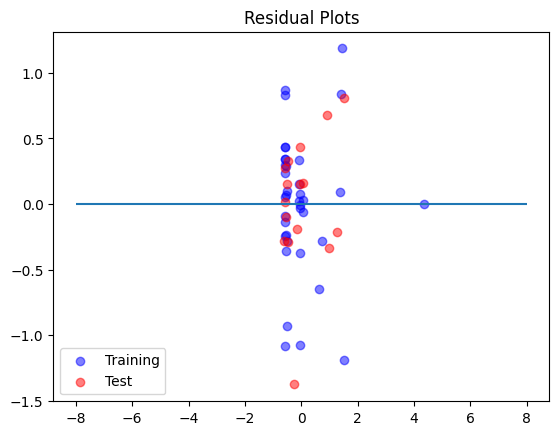

In [15]:
# 学習用データの残差プロット
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用データの残差プロット
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平線
plt.hlines(y=0,xmin=-8,xmax=8)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

### P値を求める
sklearn.linear_model.LinearRegressionでは各説明変数のp値が求められないので、statsmodelsを使って重回帰分析をします。

ここでは先ほど作成した「標準化したデータから37例（70%）をランダム選択した訓練データ」を用います。

In [22]:
import statsmodels.api as sm

# データをロード
X_train_c = sm.add_constant(X_train)  # 定数項（切片）を追加

# 型の確認
print(type(Y_train))
print(type(X_train_c))

# OLSモデルの構築とフィット
ols_model = sm.OLS(Y_train, X_train_c)
results = ols_model.fit()

# 結果の要約を出力
print(results.summary())

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     16.91
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           1.99e-08
Time:                        13:08:17   Log-Likelihood:                -28.607
No. Observations:                  37   AIC:                             71.21
Df Residuals:                      30   BIC:                             82.49
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

In [25]:
# prompt: Y_train, X_train_cをデータフレームに変換し、dfのヘッダー行を付けておくと、結果の要約の際に、x1, x2でなく、変数名が表示されて分かりやすくなると思うので、そのようにして下さい。

# statsmodelsのsummaryで変数名が表示されるように、DataFrameに変換し、列名を付与
X_train_df = pd.DataFrame(X_train_c, columns=['const'] + list(df2_except_sales.columns))
Y_train_df = pd.DataFrame(Y_train, columns=['sales'])

# OLSモデルの構築とフィット（DataFrameを使用）
ols_model_df = sm.OLS(Y_train_df, X_train_df)
results_df = ols_model_df.fit()

# 結果の要約を出力
print(results_df.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     16.91
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           1.99e-08
Time:                        13:17:57   Log-Likelihood:                -28.607
No. Observations:                  37   AIC:                             71.21
Df Residuals:                      30   BIC:                             82.49
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0041      0.104      0.040      0.9

### 主な結果の見方
*  **R-squared（決定係数）**は目的変数の変動の何％を説明変数全体が説明できているかを示す。大きい方がよい。
*  **Adj. R-squared（自由度調整済み決定係数）**
*  **Prob (F-statistic)（有意F）**は「重回帰式のすべての偏回帰係数が0」の検定のP値であり、重回帰式全体の有意性を示す。値が小さいほうが重回帰式の当てはまりがよいことを示す。
*  **coef（偏回帰係数の値）**偏回帰係数は、”その説明変数の値が1増えた時に目的変数がどれくらい増える(または減る)か”を表しています。
つまり偏回帰係数が5である変数の場合、その変数が1増えれば目的変数が5増えるという意味になります。\
また他の変数と比較してどの説明変数が目的変数に影響を与えているのか知りたい場合は、データを事前に標準化してから回帰分析を実行します。データを標準化することで変数間の尺度がそろうため、説明変数同士の比較が可能となります。標準化されたデータの偏回帰係数のことを**標準化偏回帰係数**と呼び、通常の偏回帰係数と区別します。**標準化偏回帰係数の絶対値**が大きければ大きいほど目的変数への影響が強いと解釈します。例えば、変数Aと変数Bの標準化偏回帰係数がそれぞれ0.5と-0.6であった場合、”変数Bの方が目的変数に強く影響しており、変数Bが増えれば増えるほど目的変数は減少する”と解釈します。\
まとめると、偏回帰係数はその説明変数が目的変数にどれくらい影響するか、標準化偏回帰係数はその説明変数が他の変数と比べてどれくらい目的変数に影響するかを意味します。偏回帰係数と標準化偏回帰係数は解釈の仕方が変わってくるため、結果を見る時は注意しましょう。
*  **P(>|t|)（P値）**は、ある説明変数が目的変数に影響しているかどうかを示す。各偏回帰係数の統計的有意性を示す検定（帰無仮説：偏回帰係数βⱼ=0）のP値である。ここでのP値は、偏回帰係数が本当は0なのに、サンプルから計算した偏回帰係数が計算結果以上に0から隔たってしまう確率のこと。この確率が小さい場合、すなわち、偶然そういう結果が出ることは極めてまれであると言える場合は、前提とした仮説が誤っていたと言える。つまり、P値が有意水準（たとえば0.05）を下回っている変数は目的変数に影響している（偏回帰係数は0ではない）と言える。P値が有意水準以上の変数は「目的変数に影響しているとは言い切れない」と解釈。P値が有意水準以上の変数を説明変数から除くというのはモデル選択法の1つ。
*  **[0.025      0.975]（95%信頼区間）**

**P値**についての解説は、たとえば、[ここ](https://www.nri.com/jp/knowledge/glossary/lst/alphabet/p_value)を参照


## 演習問題


### 問題１
A) 53個のデータ全てを用い、標準化された全ての説明変数を用いて重回帰分析した場合の、自由度調整済み決定係数と標準化偏回帰係数と各説明変数のP値を求めなさい。\
B) 5%有意水準以上のP値となった説明変数を挙げなさい。\
C) B)の説明変数を除き、53個のデータ全てを用い、重回帰分析した場合の、自由度調整済み決定係数と標準化偏回帰係数と各説明変数のP値を求めなさい。

A) 53個の全データ

In [24]:
# prompt: 53個のデータ全てを用い、標準化された全ての説明変数を用いて重回帰分析した場合の、自由度調整済み決定係数と標準化偏回帰係数と各説明変数のP値を求めなさい。

# 全データを用いて標準化
df2 = df.apply(lambda x: (x - np.mean(x)) / np.std(x))

# 説明変数 (salesを除く全ての標準化された変数)
X = df2.drop('sales', axis=1)

# 目的変数 (sales)
Y = df2['sales']

# statsmodelsを用いて重回帰分析を実行
X = sm.add_constant(X)  # 定数項（切片）を追加
# 型の確認：YがpandasのSeries, XがDataFrameなので、結果の要約で変数名が表示されて分かりやすい。
print(type(Y))
print(type(X))
model = sm.OLS(Y, X)
results = model.fit()

# 結果の要約を出力
print(results.summary())

# 自由度調整済み決定係数 (Adj. R-squared)
print("\n自由度調整済み決定係数:", results.rsquared_adj)

# 標準化偏回帰係数 (coef) と P値 (P>|t|)
print("\n標準化偏回帰係数とP値:")
print(results.summary().tables[1])

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     22.08
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           4.87e-12
Time:                        13:10:28   Log-Likelihood:                -39.274
No. Observations:                  53   AIC:                             92.55
Df Residuals:                      46   BIC:                             106.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

sklearn.linear_model.LinearRegressionでの結果（下記にコピー）と同じかの確認用

```
         Name  Coefficients
0  insta_post      0.144937
1  insta_good      0.240394
2       flyer      0.424020
3       event      0.338815
4    new_item     -0.075220
5     holiday      0.123663
2.5844842985983608e-17
```

B) 5%有意水準以上のP値となった説明変数

In [26]:
# prompt: 5%有意水準以上のP値となった説明変数を挙げなさい。

# B) 5%有意水準以上のP値となった説明変数を挙げる
# P値を取得
p_values = results.pvalues

# 有意水準を設定 (5%)
alpha = 0.05

# P値が有意水準以上の説明変数名を取得 (定数項 'const' は除く)
insignificant_vars = p_values[p_values >= alpha].index.tolist()

# 定数項 'const' をリストから削除 (もしあれば)
if 'const' in insignificant_vars:
    insignificant_vars.remove('const')

print("\n5%有意水準以上のP値となった説明変数:")
if insignificant_vars:
    for var in insignificant_vars:
        print(var)
else:
    print("該当する説明変数はありません。")



5%有意水準以上のP値となった説明変数:
insta_post
insta_good
new_item
holiday


C) P値が有意水準以上の説明変数を一気にすべて削除

In [27]:
# prompt: B)の説明変数を除き、53個のデータ全てを用い、重回帰分析した場合の、自由度調整済み決定係数と標準化偏回帰係数と各説明変数のP値を求めなさい。

# B)で挙げられた説明変数を除外して重回帰分析を実行
# 説明変数リストから有意水準以上の変数を除外
if insignificant_vars:
    X_c = X.drop(insignificant_vars, axis=1)
else:
    X_c = X.copy()

# statsmodelsを用いて重回帰分析を実行
model_c = sm.OLS(Y, X_c)
results_c = model_c.fit()

# 結果の要約を出力
print(results_c.summary())

# 自由度調整済み決定係数 (Adj. R-squared)
print("\nB)で挙げられた説明変数を除外後の自由度調整済み決定係数:", results_c.rsquared_adj)

# 標準化偏回帰係数 (coef) と P値 (P>|t|)
print("\nB)で挙げられた説明変数を除外後の標準化偏回帰係数とP値:")
print(results_c.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     53.30
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           4.02e-13
Time:                        13:41:54   Log-Likelihood:                -44.949
No. Observations:                  53   AIC:                             95.90
Df Residuals:                      50   BIC:                             101.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.282e-18      0.080   2.86e-17      1.0

**実は、説明変数選択法としては、P値が有意水準以上の説明変数を一気にすべて削除するという変数選択は不適切**だと言われていて、**P値が最大のものから、説明変数を「１つずつ」減らしていく方法（変数減少法）が推奨**されている。以下では、これをやって、一気にすべて削除してしまう方法と結果を比べてみよう。

なお、予測が目的（今回のデータでいうと、売り上げの予測をできるだけ正確にしたい）の場合は、変数選択は不要で、使える変数はなるべく使った方がよい（データがあるのに使わないのはもったいない）と言われていて、不必要な変数があってもあまり害はないことが知られている。

これに対して、変数選択が必要なのは、次の場合：

- 分析の初期段階で、候補となる変数群から必要な変数を選択したい。
- 予備調査の結果から本調査を行うが、本調査で多くの項目を調査するのはコストがかかるので絞り込みたい。
- 制御すべき変数を同定したい（たくさんの変数を制御するのは難しい）。

[以上の情報の出典：成蹊大学・横浜市立大学 岩崎学先生の講義資料から]

### 変数減少法

In [29]:
# prompt: A)の結果から、変数減少法により、一つずつ説明変数を減らしていく。

# 変数減少法による変数選択関数
def backward_elimination(X, Y, significance_level):
    features = X.columns.tolist()
    while len(features) > 0:
        # 現在のモデルを構築
        model = sm.OLS(Y, sm.add_constant(X[features])).fit()
        # 各説明変数のP値を取得 (定数項は除く)
        p_values = model.pvalues[1:] # constantを除外

        # 最大のP値を取得
        max_p_value = p_values.max()

        # 最大P値が有意水準以上の場合、対応する変数を削除
        if max_p_value >= significance_level:
            # 最大P値を持つ変数の名前を取得
            variable_to_remove = p_values.idxmax()
            print(f"Removing variable: {variable_to_remove} with P-value: {max_p_value:.4f}")
            features.remove(variable_to_remove)
        else:
            # 最大P値が有意水準を下回った場合、終了
            break
    return features

# A)で標準化した全データを使用
df2 = df.apply(lambda x: (x - np.mean(x)) / np.std(x))

# 説明変数 (salesを除く全ての標準化された変数)
X = df2.drop('sales', axis=1)

# 目的変数 (sales)
Y = df2['sales']

# 有意水準 (5%)
alpha = 0.05

# 変数減少法を実行
selected_features = backward_elimination(X, Y, alpha)

print("\nSelected features after backward elimination:")
print(selected_features)

# 選択された変数を用いて最終的なモデルを構築
X_selected = X[selected_features]
X_selected = sm.add_constant(X_selected)

model_final = sm.OLS(Y, X_selected).fit()

# 最終モデルの結果の要約を出力
print("\nFinal Model Summary:")
print(model_final.summary())

# 自由度調整済み決定係数 (Adj. R-squared)
print("\nFinal Model 自由度調整済み決定係数:", model_final.rsquared_adj)

# 標準化偏回帰係数 (coef) と P値 (P>|t|)
print("\nFinal Model 標準化偏回帰係数とP値:")
print(model_final.summary().tables[1])


Removing variable: new_item with P-value: 0.5704
Removing variable: insta_post with P-value: 0.2662
Removing variable: holiday with P-value: 0.1845

Selected features after backward elimination:
['insta_good', 'flyer', 'event']

Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     42.71
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           1.03e-13
Time:                        14:07:41   Log-Likelihood:                -41.149
No. Observations:                  53   AIC:                             90.30
Df Residuals:                      49   BIC:                             98.18
Df Model:                           3                                         
Covariance Type:            nonrobust  

**１つずつ**減らしていく方法（**変数減少法**）にすると、2: insta_good も説明変数として残った。その分、自由度調整済み決定係数の値も大きくなった。0.6679→0.7064

### 問題２
学習用データとテスト用データを1:1で分割し、学習用データだけを用いて、問題１のA), B), C)を再実行しなさい。

A)

B)

C)

### 問題３
学習用データをもっと減らした場合にどうなるかを実験し、学習データ数が、自由度調整済み決定係数や標準化偏回帰係数や各説明変数のP値に与える影響について考察しなさい。
* 学習用データ数をどれくらいに減らして実験すると、考察に役立つでしょうか？また、何通りくらいの数で実験するとよいでしょうか？これらのことも考えながら実験を設計しましょう。
* 学習用データ数をより減らすと、（ランダムに選んで減らす訳ですが、）そこでたまたま選ばれたデータがどのようなものであったかの影響をより強く受けるようになると想像されます。この点も考慮して実験するとよいでしょう。
* 実験結果はグラフで表示すると分かりやすいです。どのようなグラフを書くとよいかも考えましょう。AI (Gemini)に相談するとグラフの書き方、そのためのプログラムの書き方も教えてもらえると思います。